## Final Project Combined Preliminary EDA

In [1]:
# import libraries
import numpy as np
from numpy import errstate,isneginf
import pandas as pd
from time import time
from datetime import datetime
from sklearn.metrics import f1_score
from sklearn.utils import shuffle
import re as re
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
sns.set(style = 'white')

%matplotlib inline

## Install Reverse Geocoder
This helps us get county and city data against longtitude and latitude zillow data. Source: https://github.com/thampiman/reverse-geocoder

In [2]:
# only need to install reverse_geocoder if never installed before
# !pip install reverse_geocoder
import reverse_geocoder as rg

## Read in Data

In [3]:
# load the data 
train_2016 = pd.read_csv("train_2016_v2.csv")
properties_2016 = pd.read_csv("properties_2016.csv")

# Ray reading in data from a different file location - comment this out if you need to change it please
# train_2016 = pd.read_csv("~/GitHub/berkeley/W207/zillow_final_project/zillow-prize-1/train_2016_v2.csv")
# properties_2016 = pd.read_csv("~/GitHub/berkeley/W207/zillow_final_project/zillow-prize-1/properties_2016.csv")

C:\Users\amybr\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Properties Data EDA

In [4]:
# look at properties 2016 dataframe
properties_2016.describe(include='all').transpose().sort_values(by='count')

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
storytypeid,1624,NaN,NaN,NaN,7,0,7,7,7,7,7
basementsqft,1628,NaN,NaN,NaN,646.883,538.793,20,272,534,847.25,8516
yardbuildingsqft26,2647,NaN,NaN,NaN,278.297,369.732,10,96,168,320,6141
fireplaceflag,5163,1,True,5163,NaN,NaN,NaN,NaN,NaN,NaN,NaN
architecturalstyletypeid,6061,NaN,NaN,NaN,7.20261,2.43629,2,7,7,7,27
typeconstructiontypeid,6747,NaN,NaN,NaN,5.99956,0.38405,4,6,6,6,13
finishedsquarefeet13,7672,NaN,NaN,NaN,1178.9,357.073,120,960,1296,1440,2688
buildingclasstypeid,12629,NaN,NaN,NaN,3.72595,0.5017,1,3,4,4,5
decktypeid,17096,NaN,NaN,NaN,66,0,66,66,66,66,66
finishedsquarefeet6,22001,NaN,NaN,NaN,2414.34,7695.3,117,1079,1992,3366,952576


In [5]:
# drop sparsely populated columns
properties_2016.drop(labels=['storytypeid','basementsqft','yardbuildingsqft26','architecturalstyletypeid',
                'architecturalstyletypeid','finishedsquarefeet13','buildingclasstypeid','finishedsquarefeet6',
               'finishedsquarefeet15','finishedsquarefeet50','finishedfloor1squarefeet'], axis=1,inplace=True)

# drop categorical columns for now
# TODO create dummy variables
properties_2016.drop(labels=['buildingqualitytypeid', 'decktypeid', 'fips', 'heatingorsystemtypeid', 
                'propertylandusetypeid', 'rawcensustractandblock', 'regionidcity', 'regionidcounty', 
                'regionidneighborhood', 'regionidzip', 'typeconstructiontypeid', 'censustractandblock'], 
        axis=1,inplace=True)

# drop columns with no variation or those covered by other categories
properties_2016.drop(labels=['propertycountylandusecode', 'propertyzoningdesc','fireplaceflag','assessmentyear','taxdelinquencyyear'], 
        axis=1,inplace=True)

In [6]:
properties_2016.dtypes.transpose()

parcelid                          int64
airconditioningtypeid           float64
bathroomcnt                     float64
bedroomcnt                      float64
calculatedbathnbr               float64
calculatedfinishedsquarefeet    float64
finishedsquarefeet12            float64
fireplacecnt                    float64
fullbathcnt                     float64
garagecarcnt                    float64
garagetotalsqft                 float64
hashottuborspa                   object
latitude                        float64
longitude                       float64
lotsizesquarefeet               float64
poolcnt                         float64
poolsizesum                     float64
pooltypeid10                    float64
pooltypeid2                     float64
pooltypeid7                     float64
roomcnt                         float64
threequarterbathnbr             float64
unitcnt                         float64
yardbuildingsqft17              float64
yearbuilt                       float64


In [6]:
# standardize and convert data to 1 or 0
def convert_yn(x):
    if x in ['True','Y']:
        return 1
    return 0

properties_2016['hashottuborspa'] = properties_2016['hashottuborspa'].map(convert_yn)
properties_2016['taxdelinquencyflag'] = properties_2016['taxdelinquencyflag'].map(convert_yn)

In [7]:
# interpolate missing values for the following columns
interpolate_columns = ['structuretaxvaluedollarcnt', 'taxvaluedollarcnt', \
                      'landtaxvaluedollarcnt', 'taxamount', 'lotsizesquarefeet', \
                      'garagetotalsqft']

# default interpolation method is linear, let's just stick with that
for column in interpolate_columns:
    properties_2016[column].interpolate(inplace=True)

In [8]:
# transform columns with very large st dev to log
log_transform_columns = ['structuretaxvaluedollarcnt', 'taxvaluedollarcnt', 'landtaxvaluedollarcnt', \
                        'taxamount', 'lotsizesquarefeet', 'garagetotalsqft']

eps = 1e-6
for column in log_transform_columns:
    properties_2016[column] = np.log10(properties_2016[column] + eps)


In [9]:
# normalize continuous variables
normalize_columns = ['calculatedfinishedsquarefeet', 'finishedsquarefeet12', 'garagetotalsqft', \
                     'lotsizesquarefeet', 'poolsizesum', 'yardbuildingsqft17', \
                    'structuretaxvaluedollarcnt', 'taxvaluedollarcnt', 'landtaxvaluedollarcnt',
                    'taxamount']

for column in normalize_columns:
    properties_2016[column] = (properties_2016[column] - properties_2016[column].mean()) / properties_2016[column].std()

In [11]:
properties_2016.shape
properties_2016.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
parcelid,2985217.0,1.332586e+07,7.909966e+06,1.071172e+07,1.164371e+07,1.254509e+07,1.409712e+07,1.696019e+08
airconditioningtypeid,811519.0,1.931166e+00,3.148587e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.300000e+01
bathroomcnt,2973755.0,2.209143e+00,1.077754e+00,0.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,2.000000e+01
bedroomcnt,2973767.0,3.088949e+00,1.275859e+00,0.000000e+00,2.000000e+00,3.000000e+00,4.000000e+00,2.000000e+01
calculatedbathnbr,2856305.0,2.299263e+00,1.000736e+00,1.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,2.000000e+01
calculatedfinishedsquarefeet,2929652.0,2.497649e-17,1.000000e+00,-1.003507e+00,-3.374924e-01,-1.402159e-01,1.697116e-01,5.224525e+02
finishedsquarefeet12,2709184.0,1.475316e-17,1.000000e+00,-1.811421e+00,-5.808086e-01,-2.275867e-01,3.192378e-01,2.971852e+02
fireplacecnt,312637.0,1.168710e+00,4.612729e-01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,9.000000e+00
fullbathcnt,2856305.0,2.244165e+00,9.912054e-01,1.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,2.000000e+01
garagecarcnt,883267.0,1.823517e+00,6.100354e-01,0.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.500000e+01


## Train Data ETA

In [10]:
train_2016.transactiondate = pd.to_datetime(train_2016.transactiondate, infer_datetime_format=True)
train_2016.set_index(keys='parcelid',inplace=True)
print(train_2016.shape)
print(train_2016.dtypes)

(90275, 2)
logerror                  float64
transactiondate    datetime64[ns]
dtype: object


## Merge train + properties data

In [30]:
# create the train and dev subsets from 2016 data
df = properties_2016.merge(train_2016, on='parcelid', how='inner',left_index=True,right_index=True, copy='False')
df.set_index(keys='parcelid',inplace=True)

In [31]:
# convert Lat/Long to actual Lat/Long
# only run this cell one-time or latitude/longtitude will continue to divide by 1e6
df['latitude'] = df['latitude']/1e6
df['longitude'] = df['longitude']/1e6

# combine latitude and longtitude into one column
df['latlng'] = df['latitude'].map(str) + ',' + df['longitude'].map(str)

## Map Latitude + Longitude to City & County

In [32]:
# lookup lat/long locations
coordinates = df["latlng"].apply(lambda x: tuple(x.split(',')))
results = rg.search(coordinates.tolist())

city = [result.get("name") for result in results]
county = [result.get("admin2") for result in results]

df['city'] = city
df['county'] = county

# # create a combined variable for better categorization
# df['county_city'] = list(zip(county, city))
# df['county_city'] = df['county_city'].astype('category')

In [26]:
df.head()

,airconditioningtypeid,bathroomcnt,bedroomcnt,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,...,structuretaxvaluedollarcnt,taxvaluedollarcnt,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,logerror,transactiondate,latlng,city,county
parcelid,,,,,,,,,,,,,,,,,,,,,
10754147,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,-10.978089,-8.700717,NaN,0,0.0276,2016-01-01,"34.144442,-118.654084",Hidden Hills,Los Angeles County
10759547,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,-2.467887,-1.496675,NaN,0,-0.1684,2016-01-01,"34.14043,-118.625364",Calabasas,Los Angeles County
10843547,NaN,0.0,0.0,NaN,39.124960,NaN,NaN,NaN,NaN,NaN,...,1.993908,1.709090,1.485380,1.980845,0,-0.0040,2016-01-01,"33.989359,-118.394633",Ladera Heights,Los Angeles County
10859147,NaN,0.0,0.0,NaN,1.780895,NaN,NaN,NaN,NaN,NaN,...,1.840685,1.496686,1.248101,1.567814,0,0.0218,2016-01-02,"34.148863,-118.437206",Sherman Oaks,Los Angeles County
10879947,NaN,0.0,0.0,NaN,-0.028114,NaN,NaN,NaN,NaN,NaN,...,0.567722,0.455806,0.446414,0.487677,0,-0.0050,2016-01-02,"34.194168,-118.385816",North Hollywood,Los Angeles County


## Split dataset into train, dev, and test and filter to July 2016

In [33]:
# split the dataset into train (60%), dev (20%), and test (20%)
# Set a random seed (623) to keep our dataset consistent between runs
# Only use data from July 2016
df = shuffle(df, random_state=623)

df = df[(df['transactiondate'] >= '2016-07-01') & (df['transactiondate'] <= '2016-07-31')]

train_data, train_labels = df.iloc[:int(len(df)*0.6), np.r_[0:30, 31:len(df.columns)]], df.iloc[:int(len(df)*0.6), 30:31].values
df_train = df.iloc[:int(len(df)*0.6), :]
dev_data, dev_labels = df.iloc[int(len(df)*0.6):int(len(df)*0.8), np.r_[0:30, 31:len(df.columns)]], df.iloc[int(len(df)*0.6):int(len(df)*0.8), 30:31].values
df_dev = df.iloc[int(len(df)*0.6):int(len(df)*0.8), :]
test_data, test_labels = df.iloc[int(len(df)*0.8):, np.r_[0:30, 31:len(df.columns)]], df.iloc[int(len(df)*0.8):, 30:31].values
df_test = df.iloc[int(len(df)/2):, :]
print(train_data.shape)


(5968, 34)


In [34]:
# confirm we got the right columns with out slicing
print(*train_data.columns,sep=" - ")

airconditioningtypeid - bathroomcnt - bedroomcnt - calculatedbathnbr - calculatedfinishedsquarefeet - finishedsquarefeet12 - fireplacecnt - fullbathcnt - garagecarcnt - garagetotalsqft - hashottuborspa - latitude - longitude - lotsizesquarefeet - poolcnt - poolsizesum - pooltypeid10 - pooltypeid2 - pooltypeid7 - roomcnt - threequarterbathnbr - unitcnt - yardbuildingsqft17 - yearbuilt - numberofstories - structuretaxvaluedollarcnt - taxvaluedollarcnt - landtaxvaluedollarcnt - taxamount - taxdelinquencyflag - transactiondate - latlng - city - county


## <font color=red> Ray doing some analysis on columns before dropping. Will clean up Wednesday. Separating categorical variables and continuous </font>

In [19]:
# create a deep copy of the merged dataframe (df) above
ray_df = df.copy(deep = True)

# lookup lat/long locations
lat_long_pairs = list(zip(ray_df['latitude'], 
                          ray_df['longitude']))
results = rg.search(lat_long_pairs)

city = [result.get("name") for result in results]
county = [result.get("admin2") for result in results]

ray_df['city'] = city
ray_df['county'] = county

# create a combined variable for better categorization
ray_df['county_city'] = list(zip(county, city))

In [20]:
# EH confirm that county_city data now looks correct
# good to delete once Ray has reviewed
ray_df["county_city"].head()

parcelid
11423949        (Los Angeles County, Hawthorne)
11163930    (Los Angeles County, Santa Clarita)
10991169          (Los Angeles County, Burbank)
12542043      (Los Angeles County, Signal Hill)
17221130          (Ventura County, Simi Valley)
Name: county_city, dtype: object

## <font color=red> EH comment to Ray - not sure if you can convert a column to type "category"? </font>
### <font color=purple> AB comment to Ray/Ellie - you can convert to type "category", but you need to do it on "ray_df" (you were converting "df" which doesn't have that column) </font>

In [21]:
ray_df['county_city'] = ray_df['county_city'].astype('category')

In [22]:
# AB: Double check what those categories are
print(ray_df['county_city'].cat.categories)

Index([('Kern County', 'Edwards Air Force Base'),
                        ('Kern County', 'Lebec'),
                     ('Kern County', 'Rosamond'),
                 ('Los Angeles County', 'Acton'),
                ('Los Angeles County', 'Agoura'),
          ('Los Angeles County', 'Agoura Hills'),
            ('Los Angeles County', 'Agua Dulce'),
              ('Los Angeles County', 'Alhambra'),
          ('Los Angeles County', 'Alondra Park'),
              ('Los Angeles County', 'Altadena'),
       ...
                    ('Ventura County', 'Oxnard'),
             ('Ventura County', 'Oxnard Shores'),
                      ('Ventura County', 'Piru'),
              ('Ventura County', 'Port Hueneme'),
               ('Ventura County', 'Santa Paula'),
              ('Ventura County', 'Santa Susana'),
                   ('Ventura County', 'Saticoy'),
               ('Ventura County', 'Simi Valley'),
             ('Ventura County', 'Thousand Oaks'),
                   ('Ventura County', '

In [23]:
print(ray_df.columns)
print(len(ray_df.columns))

Index(['airconditioningtypeid', 'bathroomcnt', 'bedroomcnt',
       'calculatedbathnbr', 'calculatedfinishedsquarefeet',
       'finishedsquarefeet12', 'fireplacecnt', 'fullbathcnt', 'garagecarcnt',
       'garagetotalsqft', 'hashottuborspa', 'latitude', 'longitude',
       'lotsizesquarefeet', 'poolcnt', 'poolsizesum', 'pooltypeid10',
       'pooltypeid2', 'pooltypeid7', 'roomcnt', 'threequarterbathnbr',
       'unitcnt', 'yardbuildingsqft17', 'yearbuilt', 'numberofstories',
       'structuretaxvaluedollarcnt', 'taxvaluedollarcnt',
       'landtaxvaluedollarcnt', 'taxamount', 'taxdelinquencyflag', 'logerror',
       'transactiondate', 'latlng', 'city', 'county', 'county_city'],
      dtype='object')
36


In [24]:
ray_df[ray_df.columns[0:20]].dtypes

airconditioningtypeid           float64
bathroomcnt                     float64
bedroomcnt                      float64
calculatedbathnbr               float64
calculatedfinishedsquarefeet    float64
finishedsquarefeet12            float64
fireplacecnt                    float64
fullbathcnt                     float64
garagecarcnt                    float64
garagetotalsqft                 float64
hashottuborspa                    int64
latitude                        float64
longitude                       float64
lotsizesquarefeet               float64
poolcnt                         float64
poolsizesum                     float64
pooltypeid10                    float64
pooltypeid2                     float64
pooltypeid7                     float64
roomcnt                         float64
dtype: object

In [25]:
ray_df[ray_df.columns[20:40]].dtypes

threequarterbathnbr                  float64
unitcnt                              float64
yardbuildingsqft17                   float64
yearbuilt                            float64
numberofstories                      float64
structuretaxvaluedollarcnt           float64
taxvaluedollarcnt                    float64
landtaxvaluedollarcnt                float64
taxamount                            float64
taxdelinquencyflag                     int64
logerror                             float64
transactiondate               datetime64[ns]
latlng                                object
city                                  object
county                                object
county_city                         category
dtype: object

In [26]:
ray_df[ray_df.columns[40:]].dtypes

Series([], dtype: object)

In [27]:
def cat_or_float(df):
    categorical_col = []
    continuous_col = []
    for i in df.columns:
        if type(df[i].iloc[1]) == str:
            categorical_col.append(i)
        if type(df[i].iloc[1]) == np.float64:
            continuous_col.append(i)
    return continuous_col, categorical_col

In [28]:
cont_col, cat_col = cat_or_float(ray_df)

In [29]:
print(cont_col)
print(cat_col)

['airconditioningtypeid', 'bathroomcnt', 'bedroomcnt', 'calculatedbathnbr', 'calculatedfinishedsquarefeet', 'finishedsquarefeet12', 'fireplacecnt', 'fullbathcnt', 'garagecarcnt', 'garagetotalsqft', 'latitude', 'longitude', 'lotsizesquarefeet', 'poolcnt', 'poolsizesum', 'pooltypeid10', 'pooltypeid2', 'pooltypeid7', 'roomcnt', 'threequarterbathnbr', 'unitcnt', 'yardbuildingsqft17', 'yearbuilt', 'numberofstories', 'structuretaxvaluedollarcnt', 'taxvaluedollarcnt', 'landtaxvaluedollarcnt', 'taxamount', 'logerror']
['latlng', 'city', 'county']


In [30]:
# add logerror into the cat_col
for i in cat_col:
    print('categorical column {0} contains {1} unique values for dummy columns'.format(i, len(ray_df[i].unique())))
cat_col.append('logerror')
print(ray_df['city'].unique())

categorical column latlng contains 84562 unique values for dummy columns
categorical column city contains 227 unique values for dummy columns
categorical column county contains 6 unique values for dummy columns
['Hawthorne' 'Santa Clarita' 'Burbank' 'Signal Hill' 'Simi Valley'
 'Irvine' 'Marina del Rey' 'Hawaiian Gardens' 'Westwood, Los Angeles'
 'Portola Hills' 'Placentia' 'San Fernando' 'Anaheim' 'Los Angeles'
 'La Habra' 'Temple City' 'North Hollywood' 'West Athens' 'Canoga Park'
 'Acton' 'Los Alamitos' 'Arcadia' 'Willowbrook' 'Santa Fe Springs'
 'Boyle Heights' 'Casa Conejo' 'Long Beach' 'Oxnard' 'Bellflower'
 'Lancaster' 'Laguna Beach' 'Oxnard Shores' 'Green Valley' 'Beverly Hills'
 'Lakewood' 'Santa Paula' 'Walnut' 'South Pasadena' 'Glendora'
 'La Canada Flintridge' 'Yorba Linda' 'Seal Beach' 'Manhattan Beach'
 'Thousand Oaks' 'Pasadena' 'La Mirada' 'Chatsworth' 'San Clemente'
 'Channel Islands Beach' 'Aliso Viejo' 'Moorpark' 'Costa Mesa' 'Camarillo'
 'West Whittier-Los Nietos' '

In [31]:
cat_df = ray_df[cat_col]
con_df = ray_df[cont_col]

In [ ]:
# AB - note to others - this takes forever to run. Skip if you don't need the categories split into dummy variables
df_dummies_cat = pd.get_dummies(cat_df)

In [ ]:
print(df_dummies_cat.columns)

## <font color=green> [Ray] Going to plot corr of continuous variables (53 variables)</font>

In [32]:
print(con_df.columns)

Index(['airconditioningtypeid', 'bathroomcnt', 'bedroomcnt',
       'calculatedbathnbr', 'calculatedfinishedsquarefeet',
       'finishedsquarefeet12', 'fireplacecnt', 'fullbathcnt', 'garagecarcnt',
       'garagetotalsqft', 'latitude', 'longitude', 'lotsizesquarefeet',
       'poolcnt', 'poolsizesum', 'pooltypeid10', 'pooltypeid2', 'pooltypeid7',
       'roomcnt', 'threequarterbathnbr', 'unitcnt', 'yardbuildingsqft17',
       'yearbuilt', 'numberofstories', 'structuretaxvaluedollarcnt',
       'taxvaluedollarcnt', 'landtaxvaluedollarcnt', 'taxamount', 'logerror'],
      dtype='object')


In [33]:
def col_append(col_ind):
    col = cont_col[col_ind:col_ind+10]
    col.append('logerror')
    return col

In [34]:
df1, df2, df3, df4, df5 = con_df[col_append(0)], con_df[col_append(10)], con_df[col_append(20)], con_df[col_append(30)], con_df[col_append(40)]
df6 = con_df[con_df.columns[50:]]

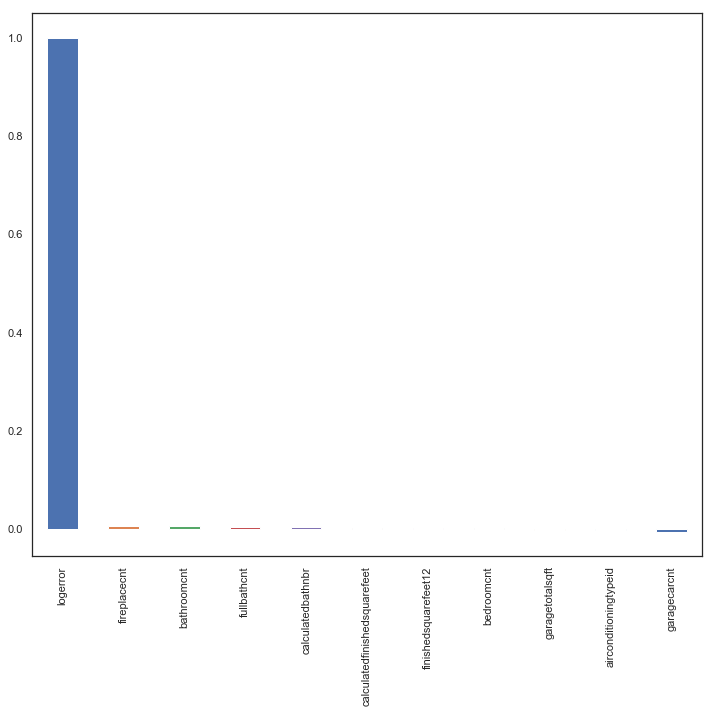

In [36]:
# df1 - get Correlation of "Churn" with other variables:
plt.figure(figsize=(12,10))
df1.corr()['logerror'].sort_values(ascending = False).plot(kind='bar')
plt.show()

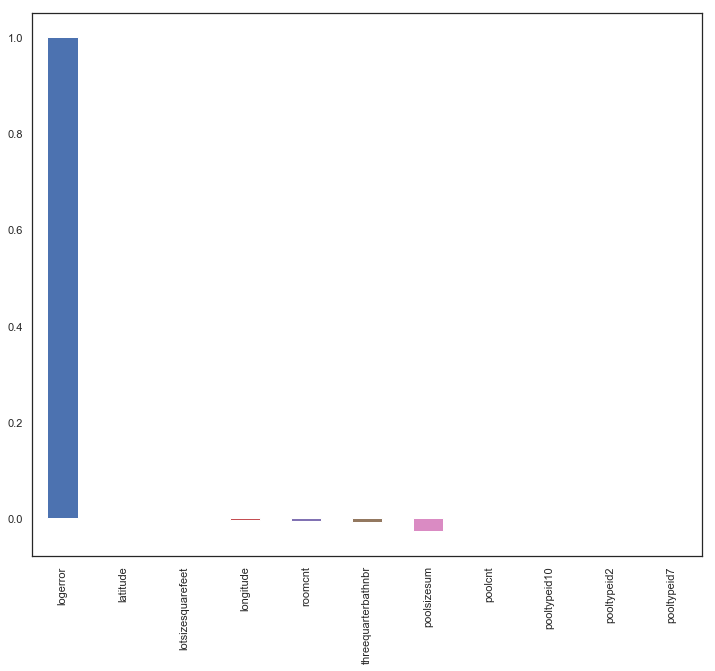

In [37]:
# df2 - get Correlation of "Churn" with other variables:
plt.figure(figsize=(12,10))
df2.corr()['logerror'].sort_values(ascending = False).plot(kind='bar')
plt.show()

In [38]:
# df3 - get Correlation of "Churn" with other variables:
plt.figure(figsize=(12,10))
df3.corr()['logerror'].sort_values(ascending = False).plot(kind='bar')
plt.show()

TypeError: sort_values() missing 1 required positional argument: 'by'

<Figure size 864x720 with 0 Axes>

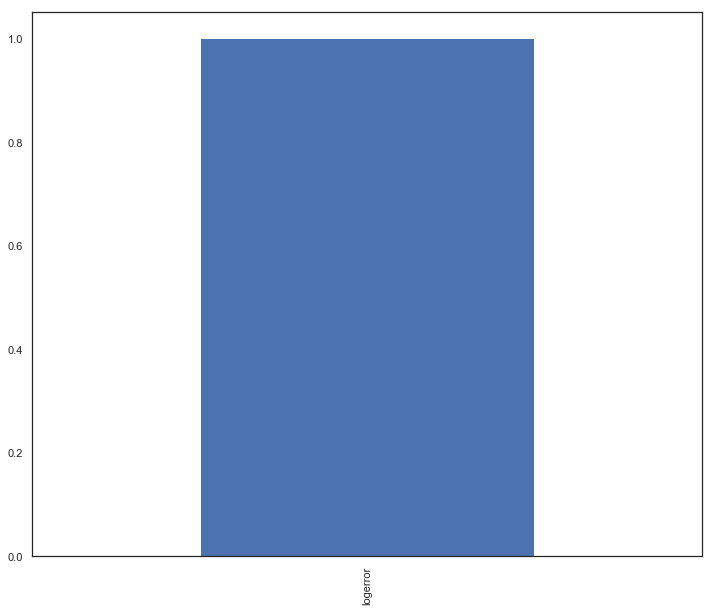

In [39]:
# df4 - get Correlation of "Churn" with other variables:
plt.figure(figsize=(12,10))
df4.corr()['logerror'].sort_values(ascending = False).plot(kind='bar')
plt.show()

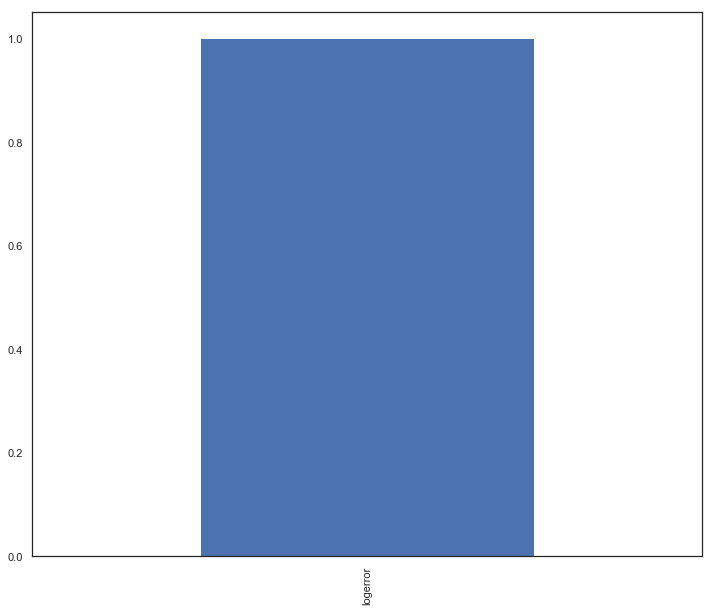

In [40]:
# df5 - get Correlation of "Churn" with other variables:
plt.figure(figsize=(12,10))
df5.corr()['logerror'].sort_values(ascending = False).plot(kind='bar')
plt.show()

In [ ]:
# df6 - get Correlation of "Churn" with other variables:
plt.figure(figsize=(16,10))
df6.corr()['logerror'].sort_values(ascending = False).plot(kind='bar')
plt.show()

## <font color=red> This is the start of feature exploration, selection, and engineering... </font>

In [ ]:
# This *will* take a while to run.
# plot distribution histograms of features 
def plt_hist(df,row,col,cnt):
    fig, ax = plt.subplots(row,col, figsize=(15,15))
    ax = ax.flatten()
    i = 0
    for c in df.columns:
        ax[i].hist(df[c])
        ax[i].set_xlabel("")
        ax[i].set_ylabel("")
        ax[i].set_title(c)
        i+=1
    if cnt < row*col:
        for i in range(cnt,row*col):
            plt.delaxes(ax[i])
    plt.tight_layout()

plt_hist(df_train,7,5,len(df_train.columns))

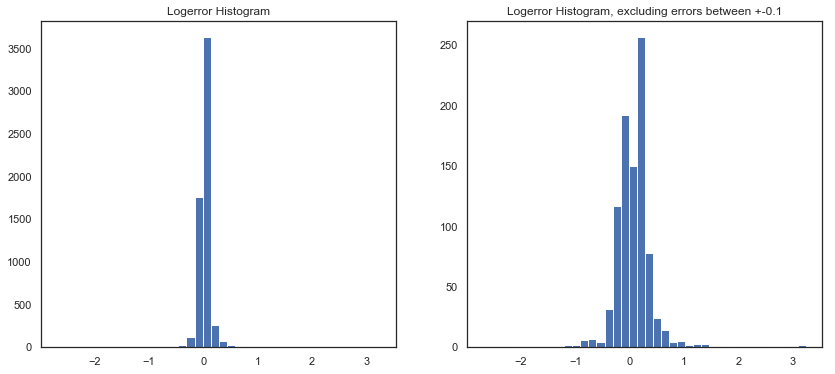

In [35]:
# plot histograms of Logerrors
fig, ax = plt.subplots(1,2, figsize=(14,6))

ax.flatten()
ax[0].hist(df_train.logerror,bins=40)
ax[0].set_title("Logerror Histogram")
ax[1].hist(df_train.logerror[np.abs(df_train.logerror) >= 0.1],bins=40)
ax[1].set_title("Logerror Histogram, excluding errors between +-0.1")
plt.show()

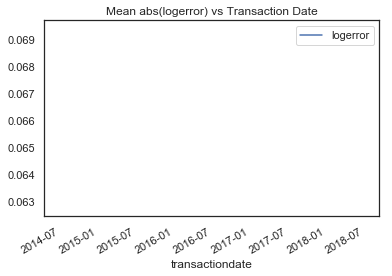

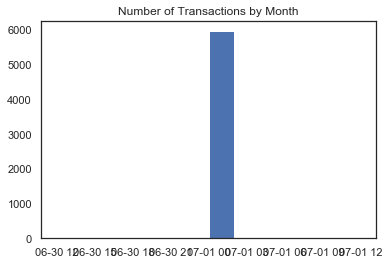

In [36]:
# plot logerrors over time
plt_df = df_train[['transactiondate','logerror']].copy()
plt_df['transactiondate'] = plt_df.transactiondate.astype('datetime64[M]')
plt_df['logerror'] = np.abs(plt_df.logerror)
g = plt_df.groupby(['transactiondate']).mean()
g.plot()
plt.title("Mean abs(logerror) vs Transaction Date")
plt.show()
plt.hist(plt_df.transactiondate,bins=12)
plt.title("Number of Transactions by Month")
plt.show()

In [37]:
# make new dataframe with absolute logerror
new_df = df_train.copy()

new_df['transactiondate'] = new_df.transactiondate.astype('datetime64[M]')
new_df['abs_logerror'] = np.abs(new_df.logerror)
new_df = new_df[new_df.transactiondate == '2016-12-01']
new_df.sort_values(by=['abs_logerror'],inplace=True, ascending=False)

new_df.head(8).transpose()

parcelid
airconditioningtypeid
bathroomcnt
bedroomcnt
calculatedbathnbr
calculatedfinishedsquarefeet
finishedsquarefeet12
fireplacecnt
fullbathcnt
garagecarcnt
garagetotalsqft


## Normalize Continuous Variables

In [ ]:
norm_df = df.copy()
norm_df.describe().transpose()

In [ ]:
normalize_columns = ['calculatedfinishedsquarefeet', 'finishedsquarefeet12', '']